# Movie Recommendation System

# Introduction

- For this project our stakeholder is Microsoft. Microsoft has recently broken into the film industry with the start of their new studio. They have also chosen to launch a streaming platform which, to start, will contain movies and their new in-house productions. Microsoft's streaming platform will start with 9,734 movie titles for their consumers.

# Business Understanding

- An information filtering system that predicts the preferences or ratings of an item by a user is known as a recommendation system. Recommendation systems are used in a variety of sectors, such as movies, shopping, music, news, social media, and general products. Generally, recommendation systems generate a list of recommendations, which can be done in several ways, including collaborative filtering or content-based filtering. Recommendation systems power most of the internet products we use today. Popular internet products such as YouTube, Netflix, Amazon, and many others depend on recommendation systems to sift through millions of contents and offer personalized recommendations to their users. Recommendation systems have been extensively researched and have been found to offer significant benefits to both internet businesses and their consumers.
- With the launch of Microsoft's new streaming platform, there is a need for a recommendations system to be in place for new and continued users. A recommendation system enhances the user experience by exposing the user to content that has a high probability of viewership for that specific user. This is vital to the success and continued use of the platform due to the plethora of available content.

# Data Understanding

- This data was provided from MovieLens dataset from the GroupLens research lab at the University of Minnesota. 

In [2]:
# Import Packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import surprise
from surprise.prediction_algorithms import *
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split
import numpy as np
import datetime as dt


In [3]:
df_links = pd.read_csv("Data/links.csv")
df_links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [4]:
df_links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB


In [5]:
# Checking the movie ID column for duplicates.
df_links['movieId'].duplicated().sum()

0

In [6]:
df_movies = pd.read_csv("Data/movies.csv")
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [8]:
# Checking the movie ID column for duplicates.
df_movies['movieId'].duplicated().sum()

0

In [9]:
df_ratings = pd.read_csv("Data/ratings.csv")
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [10]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [11]:
# Checking the movie ID column for duplicates.
df_ratings['movieId'].duplicated().sum()

91112

In [12]:
df_ratings['userId']

0           1
1           1
2           1
3           1
4           1
         ... 
100831    610
100832    610
100833    610
100834    610
100835    610
Name: userId, Length: 100836, dtype: int64

In [13]:
# counting the amount of users
print(len(df_ratings['userId'].value_counts() > 1))

610


In [14]:
print((df_ratings['rating'].value_counts()))

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: rating, dtype: int64


In [15]:
df_tags = pd.read_csv("Data/tags.csv")
df_tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [16]:
df_tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


In [17]:
df_tags['movieId'].value_counts()

296     181
2959     54
924      41
293      35
7361     34
       ... 
6107      1
5878      1
5876      1
3192      1
8190      1
Name: movieId, Length: 1572, dtype: int64

In [18]:
# Checking the movie ID column for duplicates.
df_tags['movieId'].duplicated().sum()

2111

In [19]:
# Checking how many moveId's have a value count equal to 1.
df_tagid = df_tags['movieId']
df_tagid = df_tagid.to_frame()
print(len(df_tagid['movieId'].value_counts()==1))

1572


In [20]:
# Counting the number of userId's
print(len(df_tags['userId'].value_counts() > 1))

58


In [21]:
####
"""
All code can join on movieID

"""

'\nAll code can join on movieID\n\n'

## Merging Dataframes

In [22]:
# Merge 'links' and 'movie' dataframes on movieId
dfm1 = df_links.merge(df_movies, on='movieId')
dfm1 = dfm1.dropna()
dfm1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9734 entries, 0 to 9741
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9734 non-null   int64  
 1   imdbId   9734 non-null   int64  
 2   tmdbId   9734 non-null   float64
 3   title    9734 non-null   object 
 4   genres   9734 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 456.3+ KB


In [23]:
dfm1['movieId'].duplicated().sum()

0

In [24]:
dfm2 = dfm1.merge(df_ratings, on='movieId')
dfm2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100823 entries, 0 to 100822
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   movieId    100823 non-null  int64  
 1   imdbId     100823 non-null  int64  
 2   tmdbId     100823 non-null  float64
 3   title      100823 non-null  object 
 4   genres     100823 non-null  object 
 5   userId     100823 non-null  int64  
 6   rating     100823 non-null  float64
 7   timestamp  100823 non-null  int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 6.9+ MB


In [25]:
dfm2['movieId'].duplicated().sum()

91107

In [26]:
print(len(dfm2['movieId']) - dfm2['movieId'].duplicated().sum())

9716


In [27]:
dfm2.describe()

,movieId,imdbId,tmdbId,userId,rating,timestamp
count,100823.000000,1.008230e+05,100823.000000,100823.000000,100823.000000,1.008230e+05
mean,19435.437737,3.515704e+05,20105.462633,326.130823,3.501637,1.205945e+09
std,35532.291269,6.220922e+05,53274.143620,182.618176,1.042430,2.162613e+08
min,1.000000,4.170000e+02,2.000000,1.000000,0.500000,8.281246e+08
25%,1199.000000,9.968500e+04,712.000000,177.000000,3.000000,1.019124e+09
50%,2991.000000,1.187710e+05,6957.000000,325.000000,3.500000,1.186087e+09
75%,8120.000000,3.149790e+05,11635.000000,477.000000,4.000000,1.435994e+09
max,193609.000000,8.391976e+06,525662.000000,610.000000,5.000000,1.537799e+09


In [28]:
#dfm3 = dfm2.merge(df_tags, on='movieId')
#dfm3.info()

In [29]:
dfm2 = dfm2.drop(columns= ['imdbId', 'tmdbId'], axis=1)

In [30]:
dfm2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100823 entries, 0 to 100822
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   movieId    100823 non-null  int64  
 1   title      100823 non-null  object 
 2   genres     100823 non-null  object 
 3   userId     100823 non-null  int64  
 4   rating     100823 non-null  float64
 5   timestamp  100823 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 5.4+ MB


In [31]:
dfm2['genres'].value_counts()

Comedy                                7194
Drama                                 6290
Comedy|Romance                        3967
Comedy|Drama|Romance                  3000
Comedy|Drama                          2851
                                      ... 
Animation|Horror|Mystery                 1
Comedy|Crime|Drama|Sci-Fi|Thriller       1
Action|Adventure|Romance|Sci-Fi          1
Adventure|Documentary|IMAX               1
Documentary|Musical|IMAX                 1
Name: genres, Length: 951, dtype: int64

# Data Preparation

Text(0.5, 1.0, 'Rating Frequency Breakdown')

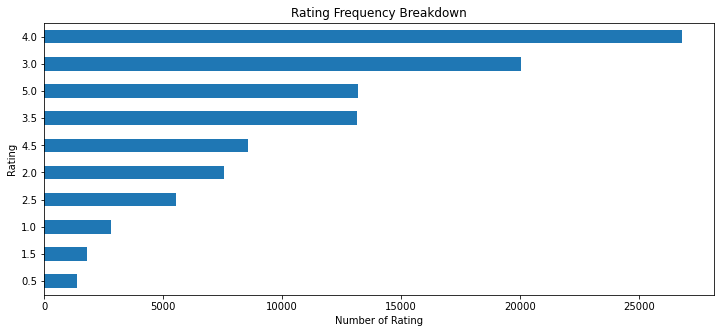

In [32]:
ax = dfm2['rating'].value_counts().plot.barh(figsize=(12,5))
ax.invert_yaxis()
ax.set_ylabel('Rating')
ax.set_xlabel('Number of Rating')
ax.set_title('Rating Frequency Breakdown')
#plt.savefig('ratingfreq.png', bbox_inches='tight', dpi=300)

In [33]:
filtered_df = dfm2[dfm2['rating'] >= 3.0]

sorted_df = filtered_df.sort_values('rating', ascending=False)
sorted_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 81754 entries, 72059 to 49503
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   movieId    81754 non-null  int64  
 1   title      81754 non-null  object 
 2   genres     81754 non-null  object 
 3   userId     81754 non-null  int64  
 4   rating     81754 non-null  float64
 5   timestamp  81754 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 4.4+ MB


In [34]:
sorted_df['movieId'].duplicated().sum()

73309

Text(0.5, 1.0, 'Number of User Ratings')

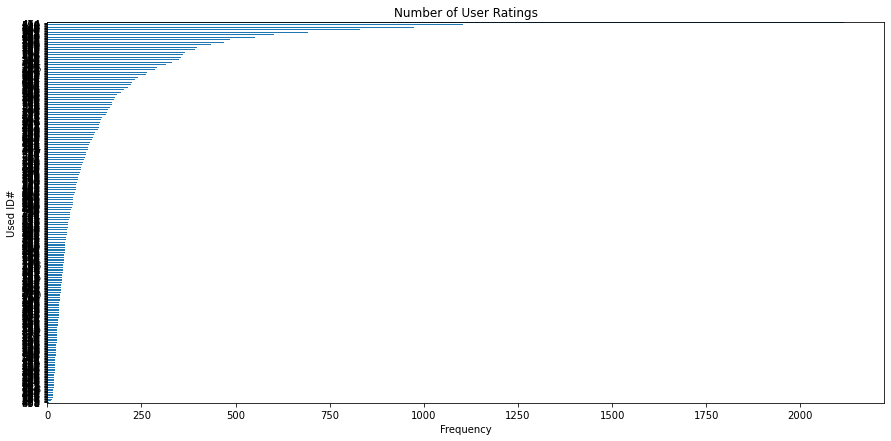

In [35]:
ax = sorted_df['userId'].value_counts().plot.barh(figsize=(15,7))
ax.invert_yaxis()
ax.set_ylabel('Used ID#')
ax.set_xlabel('Frequency')
ax.set_title('Number of User Ratings')
#plt.savefig('userrtg.png', bbox_inches='tight', dpi=300)

In [36]:
avg_high_rated = dfm2.groupby(['title']).agg({"rating":"mean"})['rating'].sort_values(ascending=False)
avg_high_rated = avg_high_rated.to_frame()
avg_high_rated.reset_index(level=0, inplace=True)
avg_high_rated.columns = ['Title', 'Average Rating']

In [37]:
avg_high_rated.head(10)

,Title,Average Rating
0,Ex Drummer (2007),5.0
1,Knock Off (1998),5.0
2,Maniac Cop 2 (1990),5.0
3,Cherish (2002),5.0
4,Idiots and Angels (2008),5.0
5,Willy/Milly (1986),5.0
6,L.A. Slasher (2015),5.0
7,Particle Fever (2013),5.0
8,Chinese Puzzle (Casse-tête chinois) (2013),5.0
9,Spellbound (2011),5.0


In [38]:
popular = dfm2.groupby(['title']).agg({"rating":"count"})['rating'].sort_values(ascending=False)

In [39]:
popular = popular.to_frame()
popular.reset_index(level=0, inplace=True)
popular.columns = ['Title', 'Number of Users watched']

In [40]:
popular.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9713 entries, 0 to 9712
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Title                    9713 non-null   object
 1   Number of Users watched  9713 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 151.9+ KB


In [41]:
rtg_countdf = pd.DataFrame(dfm2.groupby(['rating']).size(), columns=['count'])
rtg_countdf.head()

,count
rating,
0.5,1367
1.0,2811
1.5,1791
2.0,7550
2.5,5550


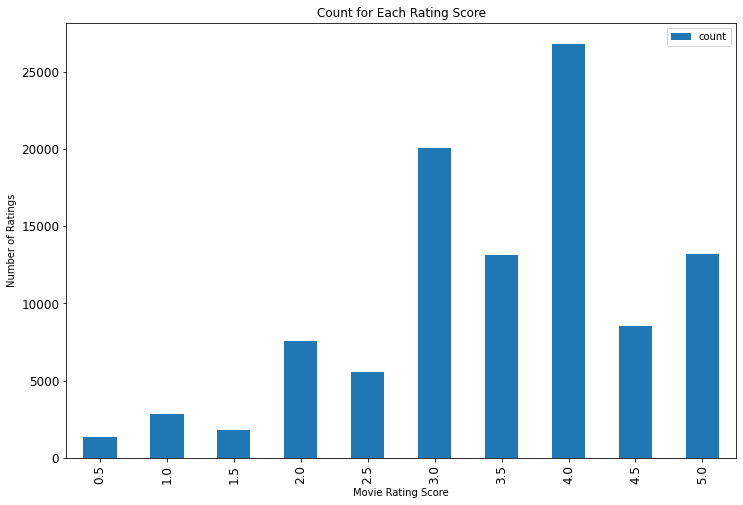

In [42]:
ax = rtg_countdf.reset_index().rename(columns={'index': 'rating score'}).plot('rating','count', 'bar',
    figsize=(12, 8),
    title='Count for Each Rating Score',
    fontsize=12)

ax.set_xlabel("Movie Rating Score")
ax.set_ylabel("Number of Ratings")
plt.savefig('Models/rtgcount.png', bbox_inches='tight', dpi=300)

In [43]:
hr_pop = pd.merge(avg_high_rated, popular, how='inner', on='Title')
hr_pop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9713 entries, 0 to 9712
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Title                    9713 non-null   object 
 1   Average Rating           9713 non-null   float64
 2   Number of Users watched  9713 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 303.5+ KB


In [44]:
hr_pop[(hr_pop['Number of Users watched']>200) & (hr_pop['Average Rating']>=3.5)]

,Title,Average Rating,Number of Users watched
721,"Shawshank Redemption, The (1994)",4.429022,317
807,Fight Club (1999),4.272936,218
932,"Usual Suspects, The (1995)",4.237745,204
934,Star Wars: Episode IV - A New Hope (1977),4.231076,251
939,Schindler's List (1993),4.225000,220
948,Star Wars: Episode V - The Empire Strikes Back...,4.215640,211
970,Pulp Fiction (1994),4.197068,307
971,"Matrix, The (1999)",4.192446,278
1034,Forrest Gump (1994),4.164134,329
1037,"Silence of the Lambs, The (1991)",4.161290,279


In [45]:
hr_pop.describe()

,Average Rating,Number of Users watched
count,9713.000000,9713.000000
mean,3.262643,10.380212
std,0.869502,22.412186
min,0.500000,1.000000
25%,2.800000,1.000000
50%,3.416667,3.000000
75%,3.910714,9.000000
max,5.000000,329.000000


In [46]:
hr_pop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9713 entries, 0 to 9712
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Title                    9713 non-null   object 
 1   Average Rating           9713 non-null   float64
 2   Number of Users watched  9713 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 303.5+ KB


In [47]:
hr_pop2= hr_pop[hr_pop['Number of Users watched'] >= 9]
hr_pop2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2441 entries, 339 to 9427
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Title                    2441 non-null   object 
 1   Average Rating           2441 non-null   float64
 2   Number of Users watched  2441 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 76.3+ KB


<AxesSubplot:>

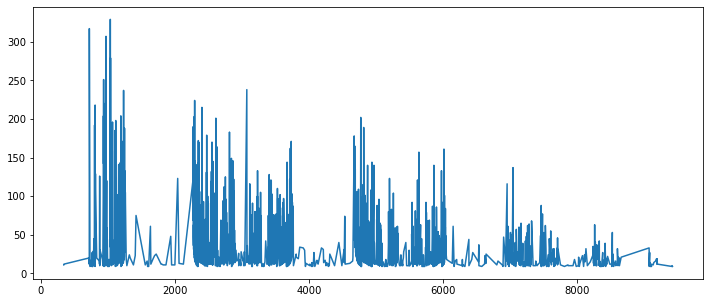

In [48]:
hr_pop2['Number of Users watched'].plot(figsize=(12,5))

In [49]:
#hr_pop2.plot.scatter(x='Title', y='Number of Users watched', alpha=0.5)


# Modeling

### Collaborative Filtering

In [50]:
print("The userId contains", len(dfm2['userId'].value_counts()), "different users that contributed a movie rating.")

The userId contains 610 different users that contributed a movie rating.


In [51]:
reader = surprise.Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(dfm2[['movieId', 'userId', 'rating']], reader)

train, test = train_test_split(data, test_size=0.2, random_state=42)

In [52]:
from surprise import KNNBasic

model = KNNBasic().fit(train)

Computing the msd similarity matrix...
Done computing similarity matrix.


In [ ]:
surprise.accuracy.mae(model.test(test))
surprise.accuracy.rmse(model.test(test))

MAE:  0.6986


# Conclusion